Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
import pandas as pd
df = pd.read_csv('../../../Code_Here/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [2]:
print(df.shape)
df.head()


(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [5]:
df['Sport'].value_counts()

Athletics                    3648
Swimming                     2486
Rowing                       2104
Ice Hockey                   1301
Hockey                       1168
Gymnastics                   1161
Fencing                      1109
Football                     1084
Canoeing                     1041
Basketball                   1000
Wrestling                     967
Volleyball                    958
Handball                      937
Cycling                       845
Water Polo                    764
Boxing                        708
Cross Country Skiing          687
Sailing                       677
Equestrianism                 663
Shooting                      542
Weightlifting                 532
Judo                          526
Speed Skating                 488
Biathlon                      388
Alpine Skiing                 354
Baseball                      333
Diving                        318
Bobsleigh                     283
Short Track Speed Skating     274
Figure Skating

In [6]:
# df[(df['Sport']=='Athletics') & (df['Event'].str.contains('metres'))]['Event'].unique()
df['Sport2'] =  df['Sport']
df.loc[df['Sport']=='Athletics', 'Sport2'] = df['Event']
df[(df['Sport']!='Athletics')].head()

print(f"Unique sports: {df['Sport'].nunique()} \nUnique Sport2: {df['Sport2'].nunique()}")

Unique sports: 55 
Unique Sport2: 136


In [7]:
df.groupby('Sport2').nunique().T

Sport2,Alpine Skiing,Archery,Art Competitions,"Athletics Men's 1,500 metres","Athletics Men's 1,500 metres Walk","Athletics Men's 1,600 metres Medley Relay",Athletics Men's 10 kilometres Walk,Athletics Men's 10 mile Walk,"Athletics Men's 10,000 metres",Athletics Men's 100 metres,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,208,142,2,68,1,9,5,3,57,71,...,86,120,130,20,25,8,752,544,415,768
Name,208,142,2,68,1,9,5,3,57,71,...,86,120,130,20,25,8,752,544,414,768
Sex,2,2,1,1,1,1,1,1,1,1,...,2,2,2,2,2,1,2,2,2,2
Age,19,28,2,14,1,7,4,3,16,16,...,21,16,22,12,13,7,24,24,23,23
Height,36,34,2,23,1,7,5,3,20,21,...,29,40,36,14,19,6,55,44,49,51
Weight,48,47,2,23,1,8,5,3,21,24,...,30,43,39,18,16,7,56,60,110,86
Team,24,21,2,25,1,3,4,1,19,17,...,17,38,39,9,13,4,21,18,58,57
NOC,24,21,2,25,1,3,4,1,19,17,...,12,38,29,9,13,3,21,16,58,57
Games,19,12,2,27,1,1,5,1,24,29,...,8,5,11,5,5,3,14,23,26,28
Year,19,12,2,27,1,1,5,1,24,29,...,8,5,11,5,5,3,14,23,26,28


In [8]:
df = df[['ID', 'Sex', 'Age', 'Height', 'Weight', 'Year','Sport2','Games', 'Season','Event', 'Medal']]
print(df.shape)
df.head()

(30181, 11)


,ID,Sex,Age,Height,Weight,Year,Sport2,Games,Season,Event,Medal
40,16,M,28.0,184.0,85.0,2014,Ice Hockey,2014 Winter,Winter,Ice Hockey Men's Ice Hockey,Bronze
41,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Individual All-Around,Bronze
42,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Team All-Around,Gold
44,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Horse Vault,Gold
48,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Pommelled Horse,Gold


In [9]:
df.groupby('Sport2').nunique().T.iloc[7].sort_values()

Sport2
Rugby Sevens                                  1
Athletics Men's 5,000 metres, Team            1
Athletics Men's Discus Throw, Both Hands      1
Golf                                          1
Athletics Men's Javelin Throw, Both Hands     1
                                             ..
Wrestling                                    28
Athletics Men's 100 metres                   29
Athletics Men's Long Jump                    29
Athletics Men's Shot Put                     29
Athletics Men's Triple Jump                  29
Name: Games, Length: 136, dtype: int64

In [10]:
df.groupby('Sport2')['ID'].count()

Sport2
Alpine Skiing                        354
Archery                              206
Art Competitions                       2
Athletics Men's 1,500 metres          77
Athletics Men's 1,500 metres Walk      1
                                    ... 
Tug-Of-War                             8
Volleyball                           958
Water Polo                           764
Weightlifting                        532
Wrestling                            967
Name: ID, Length: 136, dtype: int64

In [12]:
df[df['Sport2']=='Art Competitions']

,ID,Sex,Age,Height,Weight,Year,Sport2,Games,Season,Event,Medal
81616,41434,M,26.0,172.0,76.0,1924,Art Competitions,1924 Summer,Summer,Art Competitions Mixed Literature,Bronze
96760,48996,M,38.0,176.0,75.0,1948,Art Competitions,1948 Summer,Summer,"Art Competitions Mixed Architecture, Architect...",Gold


In [13]:
df['Games'].unique()

array(['2014 Winter', '1948 Summer', '1952 Summer', '1992 Winter',
       '1994 Winter', '2002 Winter', '2006 Winter', '1996 Summer',
       '2016 Summer', '2008 Summer', '2012 Summer', '2000 Summer',
       '2004 Summer', '1980 Summer', '1984 Summer', '1992 Summer',
       '1988 Summer', '1960 Summer', '1964 Summer', '1972 Summer',
       '1924 Winter', '1912 Summer', '1932 Summer', '1924 Summer',
       '1920 Summer', '1988 Winter', '1968 Winter', '1976 Summer',
       '2010 Winter', '1956 Summer', '1972 Winter', '1908 Summer',
       '1980 Winter', '1984 Winter', '1968 Summer', '1998 Winter',
       '1960 Winter', '1936 Summer', '1928 Summer', '1976 Winter',
       '1964 Winter', '1936 Winter', '1956 Winter', '1932 Winter',
       '1904 Summer', '1952 Winter', '1906 Summer', '1900 Summer',
       '1896 Summer', '1948 Winter', '1928 Winter'], dtype=object)

In [14]:
#Drop some sports
#feature engineering
df = df[~df['Sport2'].isin(["Snowboarding","Rugby Sevens",
                           "Beach Volleyball","Rugby","Triathlon",
                           "Trampolining","Skeleton","Tug-Of-War" ,"Golf",
                           "Art Competitions", "Lacrosse"])]

In [15]:
df['Sport2'].nunique()

125

In [16]:
pd.set_option('display.max_rows', 800)

df["Sport2"].value_counts()

Swimming                                       2486
Rowing                                         2104
Ice Hockey                                     1301
Hockey                                         1168
Gymnastics                                     1161
Fencing                                        1109
Football                                       1084
Canoeing                                       1041
Basketball                                     1000
Wrestling                                       967
Volleyball                                      958
Handball                                        937
Cycling                                         845
Water Polo                                      764
Boxing                                          708
Cross Country Skiing                            687
Sailing                                         677
Equestrianism                                   663
Shooting                                        542
Weightliftin

In [17]:
df.head()

,ID,Sex,Age,Height,Weight,Year,Sport2,Games,Season,Event,Medal
40,16,M,28.0,184.0,85.0,2014,Ice Hockey,2014 Winter,Winter,Ice Hockey Men's Ice Hockey,Bronze
41,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Individual All-Around,Bronze
42,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Team All-Around,Gold
44,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Horse Vault,Gold
48,17,M,28.0,175.0,64.0,1948,Gymnastics,1948 Summer,Summer,Gymnastics Men's Pommelled Horse,Gold


In [18]:
df['Medal'].value_counts(normalize = True)

Gold      0.336910
Bronze    0.336541
Silver    0.326548
Name: Medal, dtype: float64

In [19]:
#Split the data into train/test randomly
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [20]:
train.shape, test.shape

((23856, 11), (5965, 11))

In [21]:
train.sample(10)

,ID,Sex,Age,Height,Weight,Year,Sport2,Games,Season,Event,Medal
270281,135205,M,23.0,169.0,52.0,2016,Boxing,2016 Summer,Summer,Boxing Men's Flyweight,Gold
77469,39309,M,23.0,162.0,48.0,1972,Boxing,1972 Summer,Summer,Boxing Men's Light-Flyweight,Gold
84704,42984,F,23.0,180.0,80.0,2008,Handball,2008 Summer,Summer,Handball Women's Handball,Gold
31406,16149,M,25.0,200.0,100.0,1984,Rowing,1984 Summer,Summer,Rowing Men's Coxed Fours,Gold
67934,34710,F,28.0,168.0,63.0,2004,Athletics Women's 200 metres,2004 Summer,Summer,Athletics Women's 200 metres,Bronze
166588,83678,M,26.0,183.0,86.0,1984,Bobsleigh,1984 Winter,Winter,Bobsleigh Men's Four,Silver
269736,134973,M,25.0,174.0,74.0,1980,Hockey,1980 Summer,Summer,Hockey Men's Hockey,Bronze
210475,105686,M,29.0,174.0,72.0,1968,Modern Pentathlon,1968 Summer,Summer,Modern Pentathlon Men's Team,Silver
202133,101526,M,25.0,188.0,92.0,1984,Handball,1984 Summer,Summer,Handball Men's Handball,Silver
64668,33091,M,25.0,185.0,84.0,1980,Canoeing,1980 Summer,Summer,"Canoeing Men's Kayak Fours, 1,000 metres",Silver


In [22]:
# Split train into train & val

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape, test.shape

((19084, 11), (4772, 11), (5965, 11))

In [23]:
# The status_group column is the target
target = "Sport2"

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'ID'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [49]:
# Arrange data into X features matrix and y target vector 
X_train = train.drop(columns= [target, 'ID', 'Event'])
y_train = train[target]
X_val = val.drop(columns= [target, 'ID', 'Event'])
y_val = val[target]
X_test = test

print(X_train.shape, X_val.shape)

(19084, 8) (4772, 8)


In [27]:
!pip install category_encoders==2.*

  Using cached https://files.pythonhosted.org/packages/a0/52/c54191ad3782de633ea3d6ee3bb2837bda0cf3bc97644bb6375cf14150a0/category_encoders-2.1.0-py2.py3-none-any.whl


In [28]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [50]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

/Users/amybeisel/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy: 0.3153813914501257


In [51]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded_df = encoder.transform(X_train)

print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (19084, 8)
X_train shape after encoding (19084, 8)


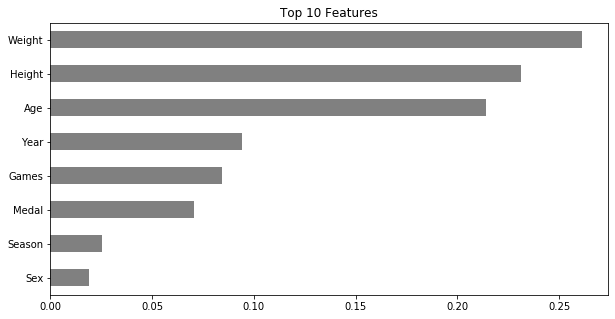

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 10
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [34]:
%%capture
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
#     !pip install category_encoders==2.*
#     !pip install pandas-profiling==2.*

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [ ]:
# Read New York City property sales data
# import pandas as pd
# df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [ ]:
# Change column names: replace spaces with underscores


In [ ]:
# Get Pandas Profiling Report


In [ ]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)


In [ ]:
# Q. What's the date range of these property sales in Tribeca?


In [ ]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers


In [ ]:
# Q. What is the maximum SALE_PRICE in this dataset?


In [ ]:
# Look at the row with the max SALE_PRICE


In [ ]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?


In [ ]:
# Keep only the single units


In [ ]:
# Q. Now what is the max sales price? How many square feet does it have?


In [ ]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 



In [ ]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?


In [ ]:
# What are the building class categories?
# How frequently does each occur?


In [ ]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)


In [ ]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE


In [ ]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"


In [ ]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?


In [ ]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)


In [ ]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline


In [ ]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
